In [1]:
import keras
from keras import layers

import numpy as np
import random
import io

In [2]:
path="/content/Toreadory_z_Vasiukivky.txt"

In [3]:
with io.open(path, encoding="utf-8") as f:
    text = f.read().lower()
text = text.replace("\n", " ")  # We remove newlines chars for nicer display
print("Corpus length:", len(text))

chars = sorted(list(set(text)))
print("Total chars:", len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i : i + maxlen])
    next_chars.append(text[i + maxlen])
print("Number of sequences:", len(sentences))

x = np.zeros((len(sentences), maxlen, len(chars)), dtype="bool")
y = np.zeros((len(sentences), len(chars)), dtype="bool")
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Corpus length: 849869
Total chars: 77
Number of sequences: 283277


In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=(maxlen, len(chars))),
        layers.LSTM(128),
        layers.Dense(len(chars), activation="softmax"),
    ]
)
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer)

In [5]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [6]:
epochs = 5
batch_size = 128

for epoch in range(epochs):
    model.fit(x, y, batch_size=batch_size, epochs=1)
    print()
    print("Generating text after epoch: %d" % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print("...Diversity:", diversity)

        generated = ""
        sentence = text[start_index : start_index + maxlen]
        print('...Generating with seed: "' + sentence + '"')

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.0
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            sentence = sentence[1:] + next_char
            generated += next_char

        print("...Generated: ", generated)
        print("-")

2214/2214 [==============================] - 300s 135ms/step - loss: 2.2688

Generating text after epoch: 0
...Diversity: 0.2
...Generating with seed: "ки самі попадаєте у воду та й годі. треб"
...Generated:  а тоді від серед собі самому на було все що було було було було від селе на було від серед серед потім до від сумно від добрем село від скоро від село було не було від серед — то не було від серед спортувати своє від серед серед саморів на мене від серед сама в голосими все що від серед сумно в мене все що від серед потім на самому від серед серед серед самом на було від серед сами запанала від су
-
...Diversity: 0.5
...Generating with seed: "ки самі попадаєте у воду та й годі. треб"
...Generated:  а китовою засказав поїхав. 	і то вона було на стоялію. і толя мами, на матим просто все під сороді, що до тобі, — не було встаку від собою село і собі сама повгорими до валик закородик запорі саме тоті обраться під ява буди, — тепе, він до вастом сказав — і все не можна бачив просто не 

2 завдання

In [7]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [8]:
txt_1 = 'I`d like to eat ice cream with you!'
classifier(txt_1)

[{'label': 'POSITIVE', 'score': 0.9996737241744995}]

In [9]:
txt_2 = 'I like programming on C++'
classifier(txt_2)

[{'label': 'POSITIVE', 'score': 0.982823371887207}]

In [10]:
txt_3 = 'I`m really in bad mood'
classifier(txt_3)

[{'label': 'NEGATIVE', 'score': 0.9997708201408386}]

In [11]:
classifier = pipeline("zero-shot-classification",model="sileod/deberta-v3-base-tasksource-nli")

config.json:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/738M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

In [13]:
txt_1 = 'Я люблю програмувати'#модель за текстом рахує ймовірність належності до класу з масиву candidate_labels
candidate_labels = ['комп\'ютер', 'програмування', 'відпочинок']
classifier(txt_1, candidate_labels)#як бачимо в результаті, хоч комп'ютер і пов'язаний з програмуванням, але модель дала всього 10% приналежності

{'sequence': 'Я люблю програмувати',
 'labels': ['програмування', "комп'ютер", 'відпочинок'],
 'scores': [0.8228944540023804, 0.09935015439987183, 0.07775536924600601]}

3 завдання

In [16]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import numpy as np
import tensorflow as tf
from keras.applications import vgg19

base_image_path = '/content/witcher.jpg'
style_reference_image_path = '/content/Cyberpunk-2077_DrkcULI.jpg'

result_prefix = "Witcher cyberpunk"

# Weights of the different loss components
total_variation_weight = 1e-6
style_weight = 1e-6
content_weight = 2.5e-8

# Dimensions of the generated picture.
width, height = keras.utils.load_img(base_image_path).size
img_nrows = 400
img_ncols = int(width * img_nrows / height)

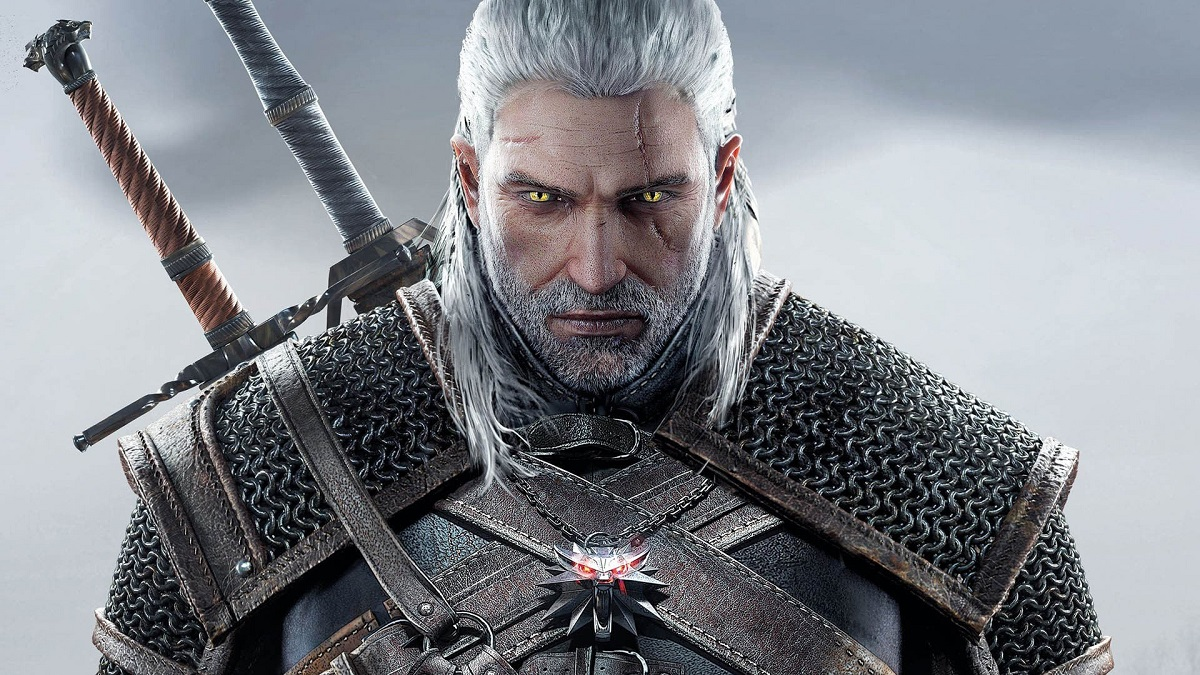

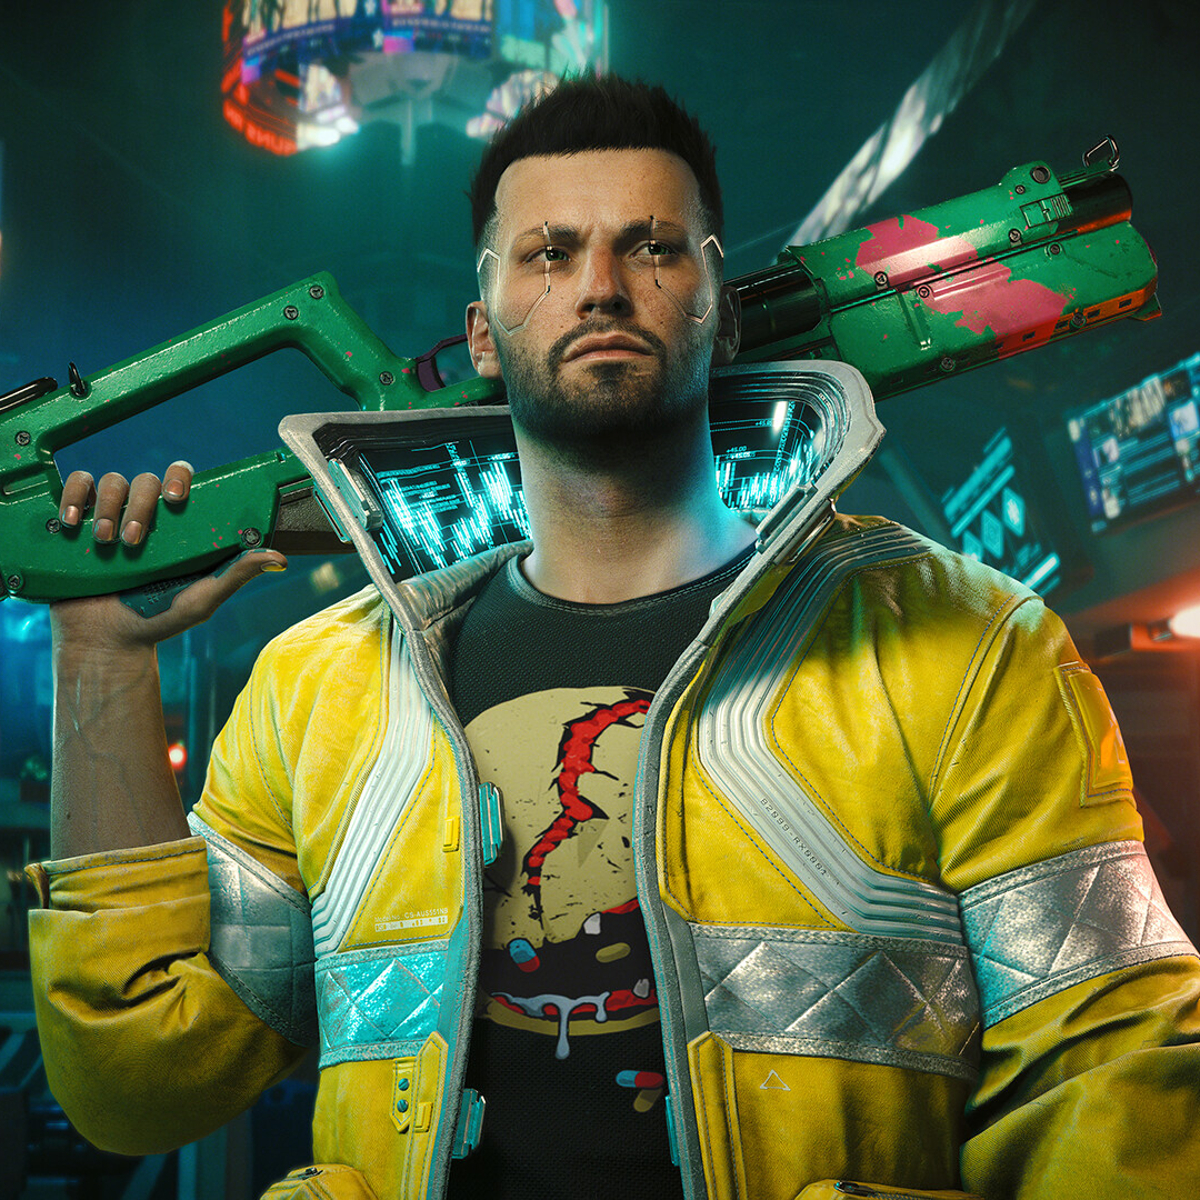

In [17]:
from IPython.display import Image, display

display(Image(base_image_path))
display(Image(style_reference_image_path))

In [18]:
def preprocess_image(image_path):
    # Util function to open, resize and format pictures into appropriate tensors
    img = keras.utils.load_img(image_path, target_size=(img_nrows, img_ncols))
    img = keras.utils.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return tf.convert_to_tensor(img)


def deprocess_image(x):
    # Util function to convert a tensor into a valid image
    x = x.reshape((img_nrows, img_ncols, 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype("uint8")
    return x

In [19]:
# The gram matrix of an image tensor (feature-wise outer product)


def gram_matrix(x):
    x = tf.transpose(x, (2, 0, 1))
    features = tf.reshape(x, (tf.shape(x)[0], -1))
    gram = tf.matmul(features, tf.transpose(features))
    return gram


# The "style loss" is designed to maintain
# the style of the reference image in the generated image.
# It is based on the gram matrices (which capture style) of
# feature maps from the style reference image
# and from the generated image


def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_nrows * img_ncols
    return tf.reduce_sum(tf.square(S - C)) / (4.0 * (channels**2) * (size**2))


# An auxiliary loss function
# designed to maintain the "content" of the
# base image in the generated image


def content_loss(base, combination):
    return tf.reduce_sum(tf.square(combination - base))


# The 3rd loss function, total variation loss,
# designed to keep the generated image locally coherent


def total_variation_loss(x):
    a = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, 1:, : img_ncols - 1, :]
    )
    b = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, : img_nrows - 1, 1:, :]
    )
    return tf.reduce_sum(tf.pow(a + b, 1.25))

In [20]:
# Build a VGG19 model loaded with pre-trained ImageNet weights
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])

# Set up a model that returns the activation values for every layer in
# VGG19 (as a dict).
feature_extractor = keras.Model(inputs=model.inputs, outputs=outputs_dict)

80134624/80134624 [==============================] - 0s 0us/step


In [21]:
# List of layers to use for the style loss.
style_layer_names = [
    "block1_conv1",
    "block2_conv1",
    "block3_conv1",
    "block4_conv1",
    "block5_conv1",
]
# The layer to use for the content loss.
content_layer_name = "block5_conv2"


def compute_loss(combination_image, base_image, style_reference_image):
    input_tensor = tf.concat(
        [base_image, style_reference_image, combination_image], axis=0
    )
    features = feature_extractor(input_tensor)

    # Initialize the loss
    loss = tf.zeros(shape=())

    # Add content loss
    layer_features = features[content_layer_name]
    base_image_features = layer_features[0, :, :, :]
    combination_features = layer_features[2, :, :, :]
    loss = loss + content_weight * content_loss(
        base_image_features, combination_features
    )
    # Add style loss
    for layer_name in style_layer_names:
        layer_features = features[layer_name]
        style_reference_features = layer_features[1, :, :, :]
        combination_features = layer_features[2, :, :, :]
        sl = style_loss(style_reference_features, combination_features)
        loss += (style_weight / len(style_layer_names)) * sl

    # Add total variation loss
    loss += total_variation_weight * total_variation_loss(combination_image)
    return loss

In [22]:
@tf.function
def compute_loss_and_grads(combination_image, base_image, style_reference_image):
    with tf.GradientTape() as tape:
        loss = compute_loss(combination_image, base_image, style_reference_image)
    grads = tape.gradient(loss, combination_image)
    return loss, grads

In [23]:
optimizer = keras.optimizers.SGD(
    keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=100.0, decay_steps=10.0, decay_rate=0.95
    )
)

base_image = preprocess_image(base_image_path)
style_reference_image = preprocess_image(style_reference_image_path)
combination_image = tf.Variable(preprocess_image(base_image_path))

iterations = 50
for i in range(1, iterations + 1):
    loss, grads = compute_loss_and_grads(
        combination_image, base_image, style_reference_image
    )
    optimizer.apply_gradients([(grads, combination_image)])
    print("Iteration %d: loss=%.2f" % (i, loss))
    img = deprocess_image(combination_image.numpy())
    fname = result_prefix + "_at_iteration_%d.png" % i
    keras.utils.save_img(fname, img)

Iteration 1: loss=82936.80
Iteration 2: loss=65620.93
Iteration 3: loss=52687.27
Iteration 4: loss=45710.80
Iteration 5: loss=41309.75
Iteration 6: loss=38145.14
Iteration 7: loss=35734.38
Iteration 8: loss=33806.16
Iteration 9: loss=32184.55
Iteration 10: loss=30770.20
Iteration 11: loss=29509.83
Iteration 12: loss=28373.21
Iteration 13: loss=27337.03
Iteration 14: loss=26385.19
Iteration 15: loss=25505.83
Iteration 16: loss=24688.73
Iteration 17: loss=23926.85
Iteration 18: loss=23213.39
Iteration 19: loss=22543.00
Iteration 20: loss=21911.59
Iteration 21: loss=21315.19
Iteration 22: loss=20751.12
Iteration 23: loss=20216.66
Iteration 24: loss=19709.52
Iteration 25: loss=19227.54
Iteration 26: loss=18768.41
Iteration 27: loss=18330.56
Iteration 28: loss=17912.61
Iteration 29: loss=17513.76
Iteration 30: loss=17132.43
Iteration 31: loss=16767.47
Iteration 32: loss=16418.04
Iteration 33: loss=16083.28
Iteration 34: loss=15762.31
Iteration 35: loss=15454.28
Iteration 36: loss=15158.28
I

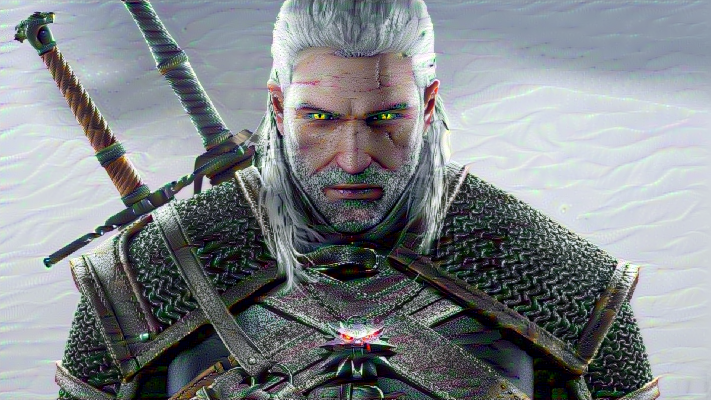

In [24]:
display(Image(result_prefix + "_at_iteration_50.png"))